In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
# Get data from csv into dataframe
train_csv = pd.read_csv("../data/train.csv")
test_csv = pd.read_csv("../data/test.csv")

In [3]:
# Get the ids for train and test data
train_ID = train_csv['Id']
test_ID = test_csv['Id']

In [4]:
# Drop ids from train and test dataset
train_csv.drop('Id', axis=1, inplace=True)
test_csv.drop('Id', axis=1, inplace=True)

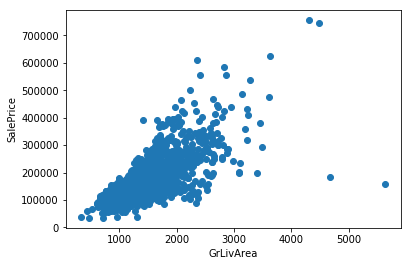

In [5]:
#scatter plot grlivarea/saleprice for checking the trend and outliers
# Same plot can be checked for other features as well
fig, ax = plt.subplots()
var = "GrLivArea"
ax.scatter(x=train_csv[var], y=train_csv['SalePrice'])

plt.xlabel(var)
plt.ylabel("SalePrice")
plt.show()

In [6]:
# Remove outliers based on GrLivArea from train dataset
train_csv = train_csv.drop(train_csv[(train_csv['GrLivArea']>4000) & (train_csv['SalePrice']<300000)].index)

Skewness of salePrice : 1.881296
Kurtosis of salePrice : 6.523067


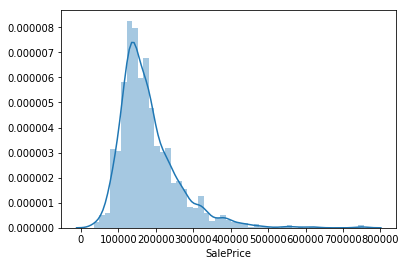

In [7]:
# Checking the skewness and kurtosis of salePrice of training data
print("Skewness of salePrice : %f"% train_csv['SalePrice'].skew())
print("Kurtosis of salePrice : %f"% train_csv['SalePrice'].kurt())

sns.distplot(train_csv['SalePrice'])


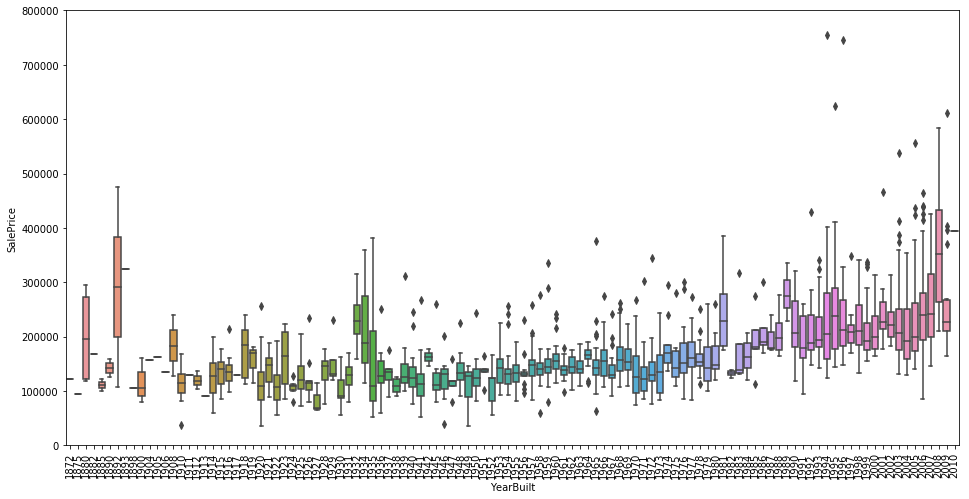

In [8]:
var = 'YearBuilt'
data = pd.concat([train_csv['SalePrice'], train_csv[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

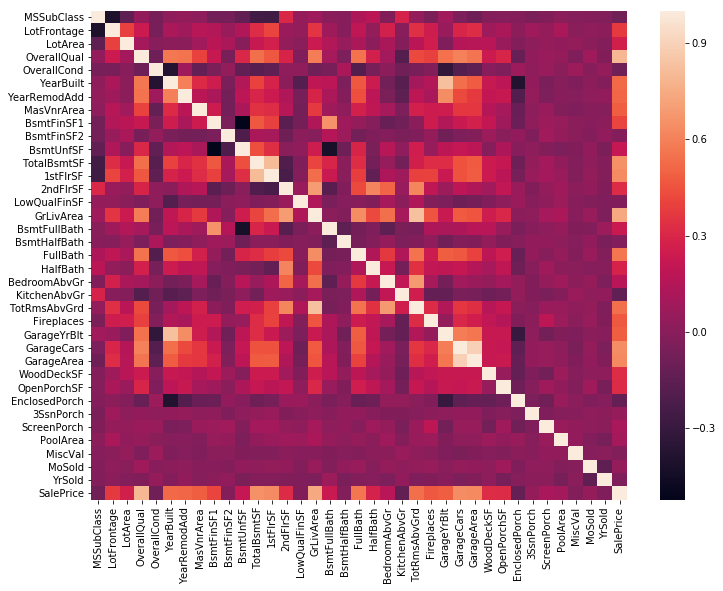

In [9]:
# Correlation map between training features for feature engineering purpose
corrmat = train_csv.corr()
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat)

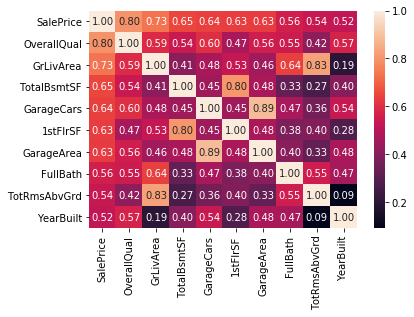

In [10]:
k=10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train_csv[cols].values.T)

f = sns.heatmap(cm, cbar=True, fmt=".2f", annot=True, xticklabels=cols.values, yticklabels=cols.values)
# print(cm)

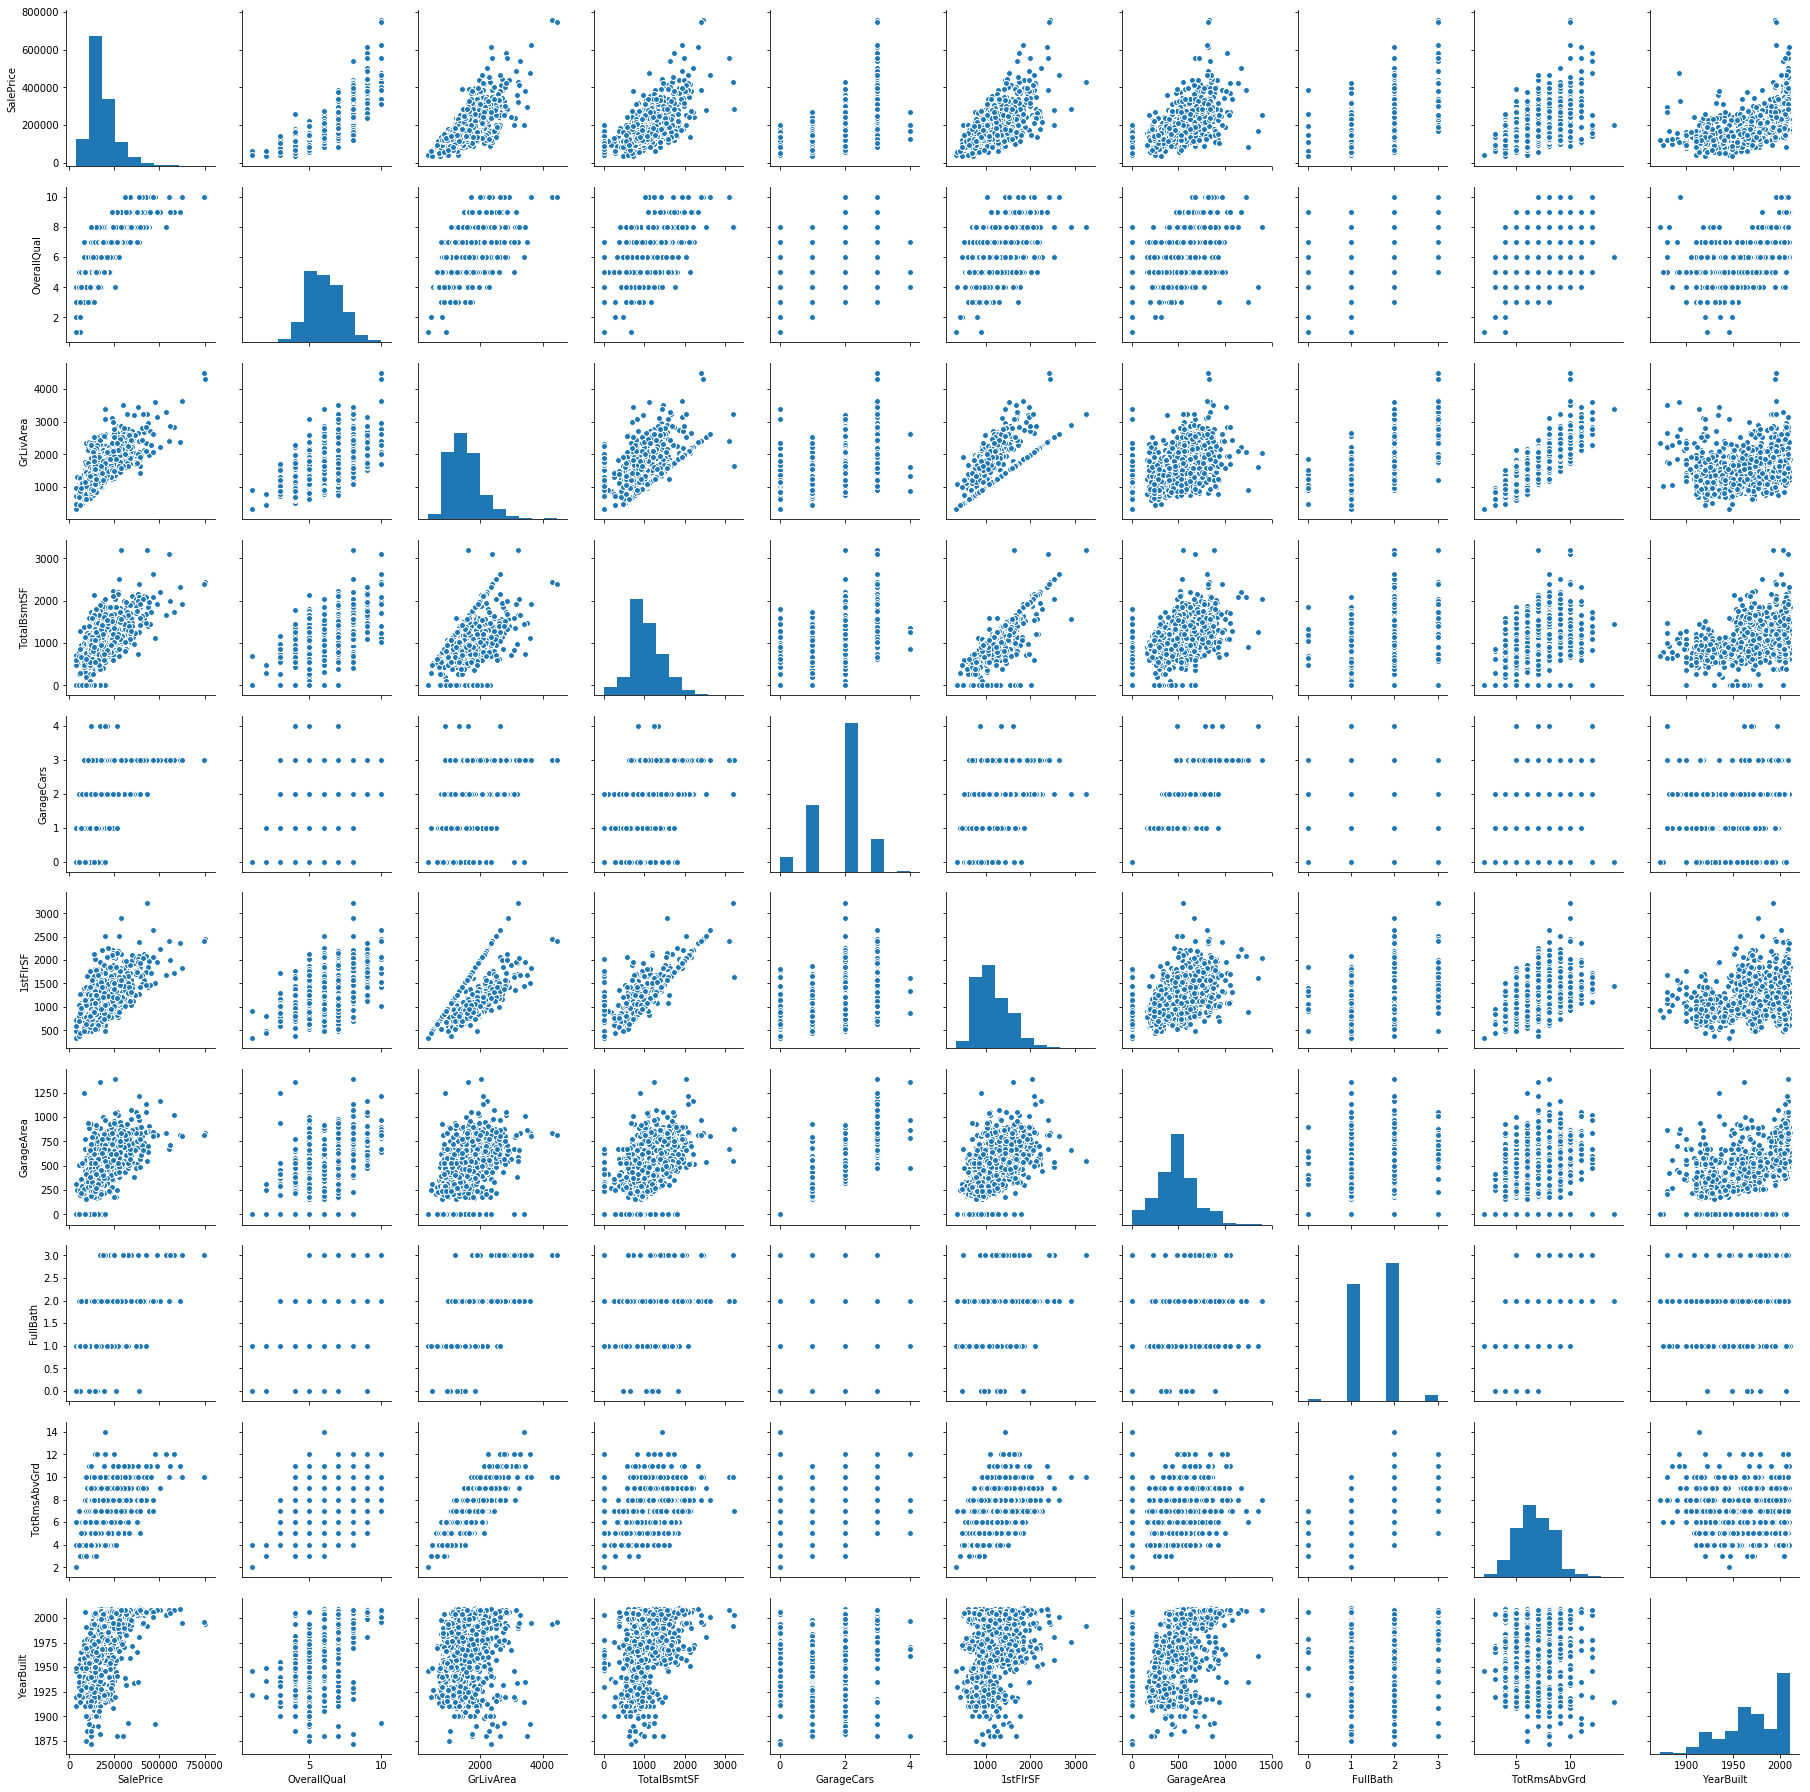

In [11]:
sns.pairplot(train_csv[cols], size=2.5)

In [12]:
# Log-transformation of the target variable to make it more normally distributed

train_csv['SalePrice'] = np.log1p(train_csv['SalePrice'])


In [13]:
# append both train and test data for feature engineering and EDA
ntrain = train_csv.shape[0]
ntest = test_csv.shape[0]

y_train = train_csv.SalePrice.values

all_data = pd.concat((train_csv, test_csv)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [14]:
# Get missing data ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


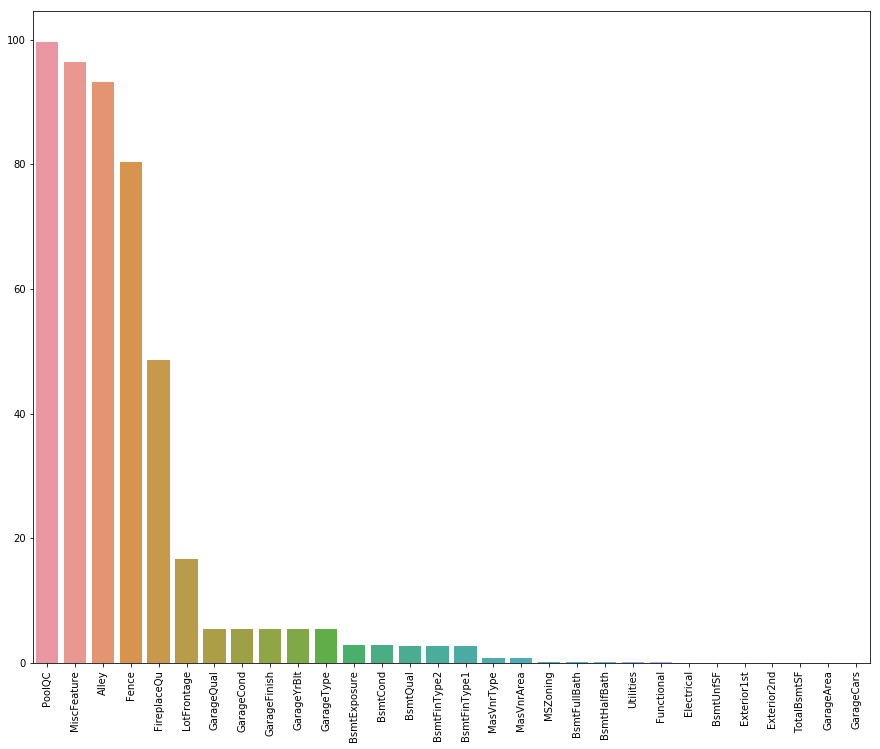

In [15]:
# Plot between most missing data feature wise
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)

In [16]:
# Play with missing data for all features. Assigning None values to missing data
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")

In [17]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [18]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [19]:
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [20]:
# Assigning median value to missing data
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [21]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna("None")

In [22]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna("None")

In [23]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna("None")
    
all_data['TotalBsmtSF'].replace("None", 0, inplace=True)

In [24]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [25]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [26]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

In [27]:
# Dropping utilities feature as it is having most data missing
all_data = all_data.drop(['Utilities'], axis=1)

In [28]:
# Assigning most used categorical type to missing values
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [29]:
# Assigning most used categorical type to missing values
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [30]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [31]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])


In [32]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [33]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [34]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({"Missing Ratio": all_data_na})

In [35]:
# Transforming some numerical variables that are really categorical
all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [36]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

In [37]:
all_data['TotalSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['TotalBsmtSF']

In [38]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [39]:
skewed_feats = skewed_feats[abs(skewed_feats) > .75].index
from scipy.special import boxcox1p
lam = 0.15
for c in skewed_feats:
    all_data[c] = boxcox1p(all_data[c], lam)

In [40]:
# Convert all data to dummies
all_data = pd.get_dummies(all_data)

In [41]:
# Split all data to train and test again
train = all_data[:ntrain]
test = all_data[ntrain:]

In [42]:
# Model creation starts here

In [43]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

In [44]:
#Validation function
n_folds = 5
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

In [45]:
# Split data into training and validation set
from sklearn.model_selection import train_test_split

x_training, x_valid, y_training, y_valid = train_test_split(train, y_train, test_size=0.2, random_state=0)

In [46]:
# Create Liner regression model and apply cross validation using GridSearch cross validation
linreg = LinearRegression()
param_lin = {"fit_intercept":[True, False], "normalize":[True, False], "copy_X":[True, False]}

grid_linnreg = GridSearchCV(linreg, param_lin, verbose=True, scoring='r2')
grid_linnreg.fit(x_training, y_training)

print("Best linReg model: "+ str(grid_linnreg.best_estimator_))
# print("Best Score: "+ str(linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   22.9s finished


Best linReg model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [47]:
# Find best estimator of above and get r^2 score and rmse
linreg = grid_linnreg.best_estimator_

linreg.fit(x_training, y_training)

lin_pred = linreg.predict(x_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: -15.172516014853436
RMSE Score: 1.6555348266510979


In [48]:
# Linear Regression model. Creating pipeline for using RobustScaler because this model may be sensitive to outliers
from sklearn.preprocessing import RobustScaler
linreg = make_pipeline(RobustScaler(), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))

rmse_linreg = rmse_cv(linreg)
print("LinearRegression Score: {:.4f} ({:.4f})".format(rmse_linreg.mean(), rmse_linreg.std()))

LinearRegression Score: 0.8014 (0.6455)


In [49]:
# Lasso Regression model. Again using RobustScaler for handling outliers
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=3))

rmse_lasso = rmse_cv(lasso)

print("Lasso Score: {:.4f} ({:.4f})".format(rmse_lasso.mean(), rmse_lasso.std()))

Lasso Score: 0.1115 (0.0071)


In [50]:
# ElasticNet Regression model
enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

rmse_enet = rmse_cv(enet)
print("ElasticNet Score: {:.4f} ({:.4f})".format(rmse_enet.mean(), rmse_enet.std()))

ElasticNet Score: 0.1114 (0.0072)


In [51]:
# Kernel Ridge Regression Model
from sklearn.kernel_ridge import KernelRidge
KKR = KernelRidge(alpha=0.005, kernel="polynomial", degree=1, coef0=2.5)

rmse_kkr = rmse_cv(KKR)
print("ElasticNet Score: {:.4f} ({:.4f})".format(rmse_kkr.mean(), rmse_kkr.std()))

ElasticNet Score: 0.1135 (0.0063)


In [52]:
# Gradient Boosting Regressor ensemble 
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                   max_features='sqrt', min_samples_leaf=15, 
                                   min_samples_split=10, loss='huber', random_state=5)
score = rmse_cv(GBoost)
print("GBoost Score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

GBoost Score: 0.1176 (0.0065)


In [53]:
# XG Boost regression model
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.04, learning_rate=0.05, max_depth=3, min_child_weight=1.78,
                            n_estimators=2200, reg_alpha=0.46, reg_lambda=0.85, subsample=0.52, silent=1, 
                            n_threads=-1, random_state=7)
score = rmse_cv(model_xgb)
print("GBoost Score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

GBoost Score: 0.1166 (0.0059)


In [54]:
# Stacking averaged Models Class
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone

class StackedAveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [55]:
# Use enet, GBoost and Kernel Ridge model for ensembling
stacked_averaged_models = StackedAveragingModels(base_models=(enet, GBoost, KKR), meta_model=(lasso))

score = rmse_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1095 (0.0070)


In [56]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [57]:
# Predict above stacked_averaged model
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)

stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))


0.08514343976553396


In [58]:
# predict XGB model
model_xgb.fit(train.values, y_train)
xgb_train_pred = model_xgb.predict(train.values)
xgb_pred = np.expm1(model_xgb.predict(test.values))

print(rmsle(y_train, xgb_train_pred))

0.07822305217015177


In [59]:
# '''RMSE on the entire Train data when averaging'''
print('RMSLE score on train data:')
print(rmsle(y_train, stacked_train_pred*0.70+xgb_train_pred*0.30))

RMSLE score on train data:
0.0812230203156855


In [60]:
ensemble = stacked_pred*0.70+xgb_pred*0.30

In [61]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble

In [62]:
sub.to_csv("../data/submission.csv")